<a href="https://colab.research.google.com/github/skyballengine/fc_deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring an example of an end-to-end PyTorch workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data (training)",
                      4: "making predictions and evaluating the model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [2]:
what_were_covering


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn # nn contains all. of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'


## 1. Data - Preparing and loading

Data can be almost anything in machine learning

* Structured data - spreadhseets, rows and columns
* Unstructured data - images, videos, audio, dna, text

Machine learning is a game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a stright line with *known* **parameters**.

In [4]:
# Create *known* parameters

weight = 0.7
bias = 0.3


In [5]:
# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [6]:
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning)

Three datasets

1. Training sets (like course materials)- models learn patterns here
2. Validation sets (like practice exam) -  tune models here
3. Test sets (like final exam) - see if model is ready for the wild

Generalization - The ability for a machine learning miodels to perform well on data it hasn't seen before.

In [7]:
### Let's create a training set and a test set with our data
## train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

Visualize, visulaize, visualize!


In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there any predictions?
  if predictions is not None:
    # Plot the predictions if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


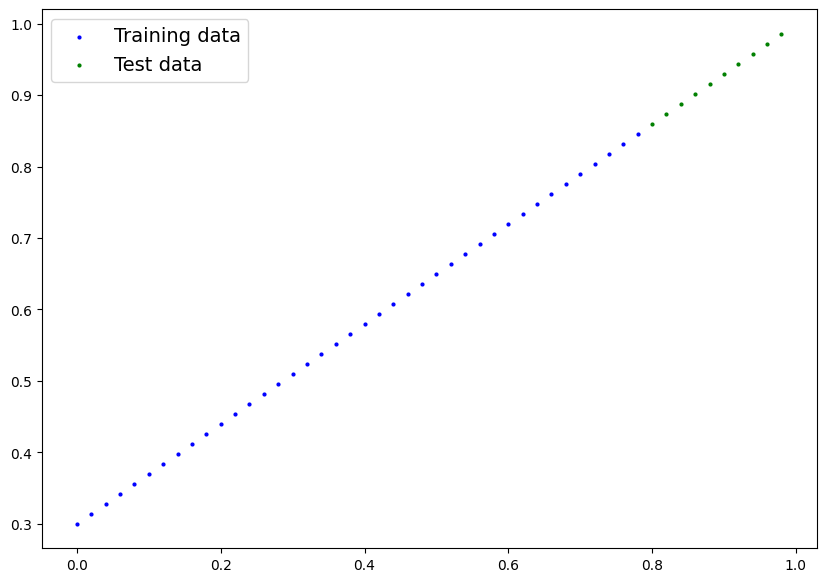

In [10]:
plot_predictions()


## 2. Build model

Our first PyTorch model!

What our model does:

1. Start with random values (weight and bias)

2. Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through 2 main algorithms:
1. Gradient descent -
2. Back propagation

In [11]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Model
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the input data
    return self.weight * x + self.bias  # linear regression formula

# Checking the contents of our PyTorch model

## Now that we have a model, what is inside?

## We can check out our model parameters or what's inside our model using **.parameters()**


In [12]:
# Let's create a random seed
torch.manual_seed(42)

# Create an instance of the model (a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Look at it's parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `X_test` and `y_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

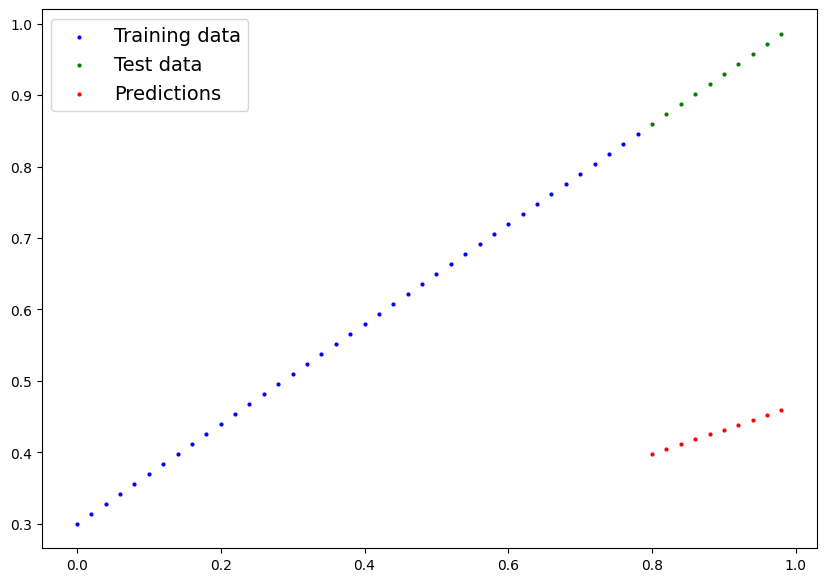

In [17]:
plot_predictions(predictions=y_preds)


## 3. Train model

The whole idea of training is for the model to move from some **unknown** parameters to **known** parameter

In other words, from a poor representation to a better representation

**Need to measure how wrong our predictions are**

In machine learning, we use loss functions to measure this metric

* Note: Loss function may also be called criterion or cost function

* **Loss function:** A function to measure how **wrong** your model's predictions are to the ideal output, lower is better.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into acount the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case)

  * Inside the optimizer you'll often have to set two parameters:
    * params - the model parameters you'd like to optimize, for example params=model_0.parameters()
    * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a larger lr results in large changes)

And for PyTorch, we need:

* A **training loop**
* A **testing loop**

In [18]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter


# Building a training loop in PyTorch and a testing loop

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving thorugh our model's `forward()` functions to make predictions on data - also called forward propagation - from input layer to output layer
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [20]:
'''
# An epoch is one loop through the data...
# This is a hyperparameter because we've set it manually
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calulate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() # start fresh with each new iteration

  # 4. Perform backpropagation on the loss with respect to the parameters of the model.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration


  # model_0.eval() # turns off gradient tracking
  '''


"\n# An epoch is one loop through the data...\n# This is a hyperparameter because we've set it manually\nepochs = 1\n\n### Training\n# 0. Loop through the data\nfor epoch in range(epochs):\n  # Set the model to training mode\n  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients\n\n  #1. Forward pass\n  y_pred = model_0(X_train)\n\n  # 2. Calulate the loss\n  loss = loss_fn(y_pred, y_train)\n\n  # 3. Optimizer zero grad\n  optimizer.zero_grad() # start fresh with each new iteration\n\n  # 4. Perform backpropagation on the loss with respect to the parameters of the model.\n  loss.backward()\n\n  # 5. Step the optimizer (perform gradient descent\n  optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration\n\n\n  # model_0.eval() # turns off gradient tracking\n  "

In [21]:
torch.manual_seed(42)
# need iterable that determines number of loops
epochs_2 = 200

# Track different values in lists
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs_2):
  # set training mode
  model_0.train()

  # forward pass
  y_predictions = model_0(X_train)
  # print(f"")

  # calculate the loss
  loss = loss_fn(y_predictions, y_train)
  # print(f"Loss: {loss}")

  # zero optimizer for next iteration
  optimizer.zero_grad()

  # back propagation
  loss.backward()

  # optimizer gradient descent
  optimizer.step()

  # Testing loop starts here
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing

  with torch.inference_mode(): # turns off gradient tracking and a couple more things
    # Can also use torch.no_grad(), which is an older version of inference_mode()
    # 1. Do the forward pass
    test_predictions = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_predictions, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    # Print out the model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [22]:
epoch_count

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

In [23]:
loss_values

[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.0891, grad_fn=<MeanBackward0>),
 tensor(0.0531, grad_fn=<MeanBackward0>),
 tensor(0.0454, grad_fn=<MeanBackward0>),
 tensor(0.0417, grad_fn=<MeanBackward0>),
 tensor(0.0382, grad_fn=<MeanBackward0>),
 tensor(0.0348, grad_fn=<MeanBackward0>),
 tensor(0.0313, grad_fn=<MeanBackward0>),
 tensor(0.0279, grad_fn=<MeanBackward0>),
 tensor(0.0245, grad_fn=<MeanBackward0>),
 tensor(0.0210, grad_fn=<MeanBackward0>),
 tensor(0.0176, grad_fn=<MeanBackward0>),
 tensor(0.0142, grad_fn=<MeanBackward0>),
 tensor(0.0107, grad_fn=<MeanBackward0>),
 tensor(0.0073, grad_fn=<MeanBackward0>),
 tensor(0.0039, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>)]

In [24]:
test_loss_values

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

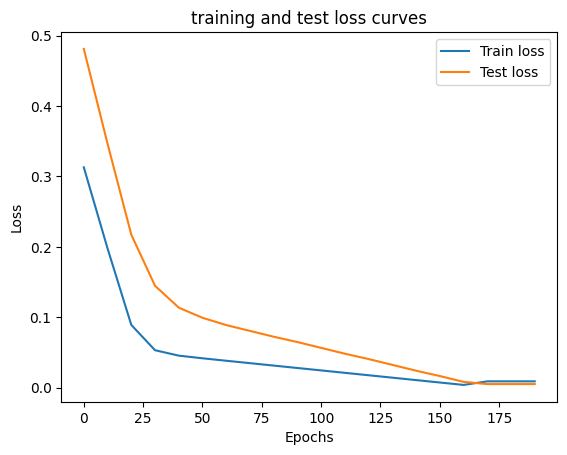

In [25]:
# Plot the loss curves
import numpy as np
# Remember that matplotlib requires numpy, so PyTorch tensors must be converted to numpy arrays using np.array(torch.tensor(loss_values).numpy())
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

print(model_0.state_dict())

weight, bias

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])


(0.7, 0.3)

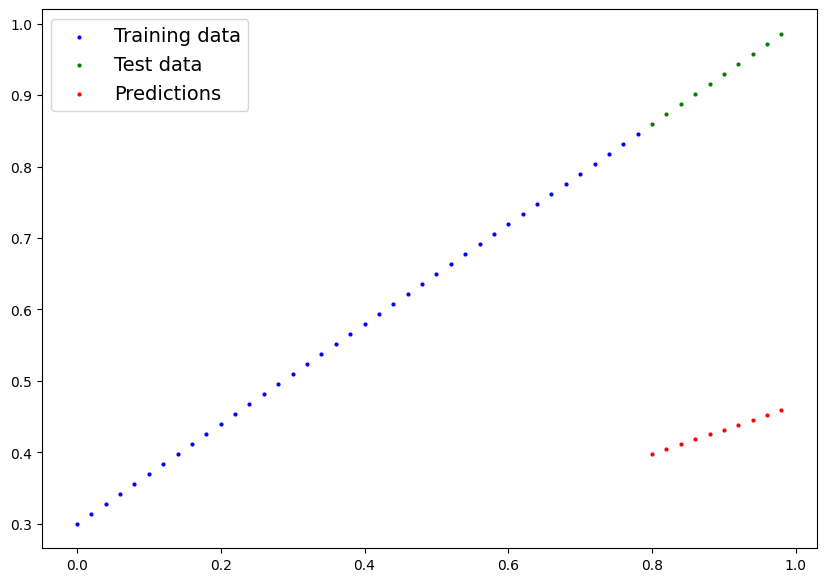

In [27]:
plot_predictions(predictions=y_preds)

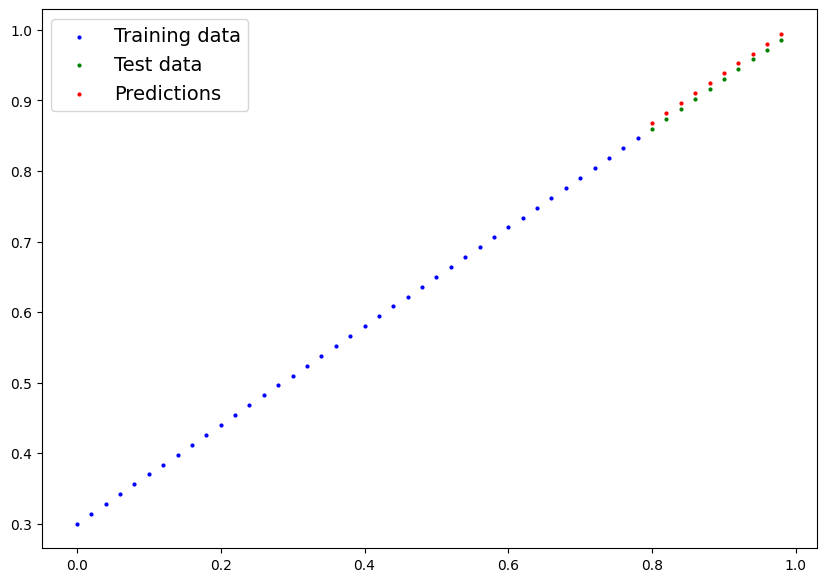

In [28]:
plot_predictions(predictions=y_preds_new)

from IPython.core.interactiveshell import PyColorize
## Saving a model in PyTorch
https://pytorch.org/tutorials/beginner/saving_loading_models.html?highlight=saving%20loading

There are three main mthods you shoul know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary



In [29]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model.state_dict()
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [30]:
!ls -la models

total 12
drwxr-xr-x 2 root root 4096 Sep 18 01:58 .
drwxr-xr-x 1 root root 4096 Sep 18 01:58 ..
-rw-r--r-- 1 root root 1207 Sep 18 01:58 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model that was saved using torch.save()

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load thje saved `state_dict()` into that.


In [31]:
# To load in a saved state_dict(), we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict()) of model_0 ( this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [32]:
loaded_model_0.state_dict(), model_0.state_dict()

(OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]))

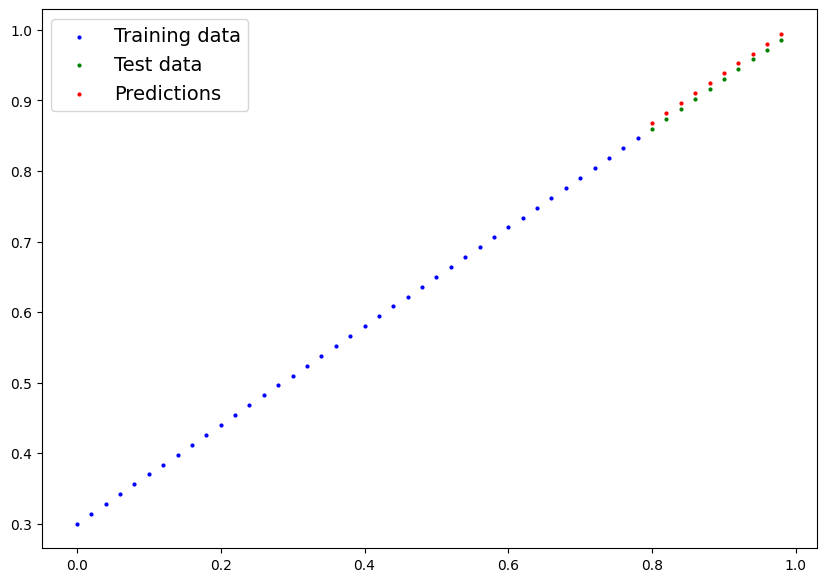

In [33]:
# Make some predictions with our loaded model
# 1. set model state to eval()
loaded_model_0.eval()

# 2. Use inference mode
with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

plot_predictions(predictions=loaded_model_0_preds)

In [34]:
loaded_model_0_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [35]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'

In [36]:
# Create device agnostic code
# If we have access to a gpu, then our code will use it ( for faster computing)
# If no gpu available, then code will default to use cpu.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cuda


In [37]:
!nvidia-smi

Mon Sep 18 01:58:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1 Data

In [38]:
# Create some data using the linear regression formula of y = weight * x + bias
weight = 0.7
bias = 0.30

# Create a range of values
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will arise
y = weight * X + bias
X[:], y[:], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

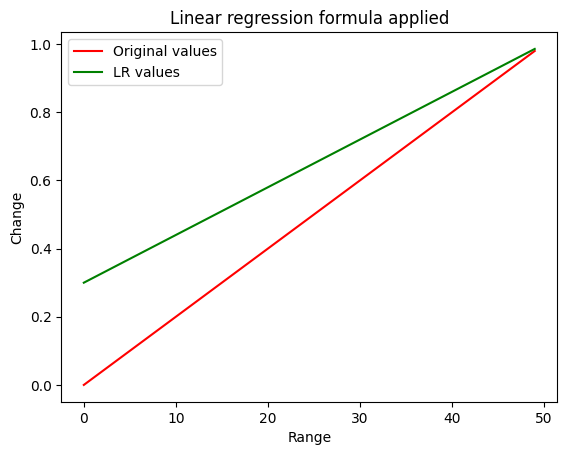

In [39]:
plt.plot(X,"r", label="Original values")
plt.plot(y, "g", label="LR values")
plt.title("Linear regression formula applied")
plt.xlabel("Range")
plt.ylabel("Change")
plt.legend()


In [40]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

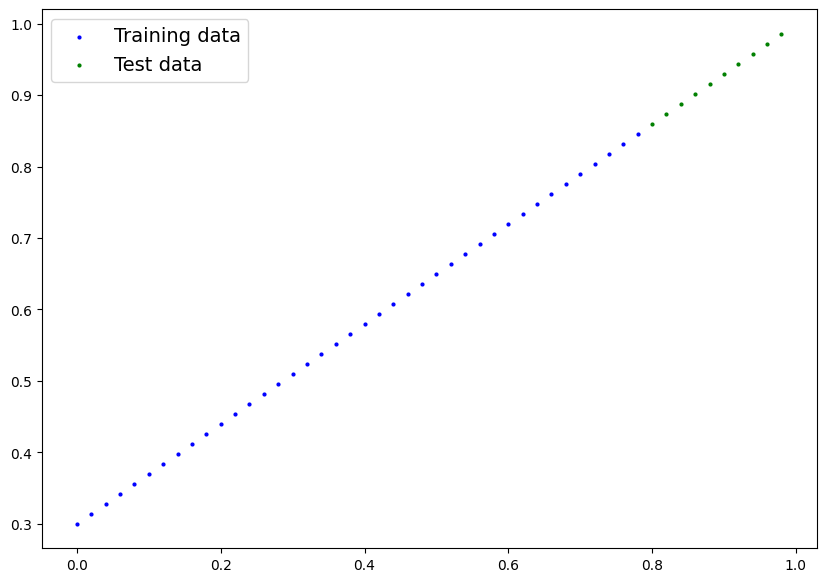

In [41]:
plot_predictions(X_train, y_train, X_test, y_test)

# 6.2 Building a PyTorch Linear model


In [42]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    ## Use nn.Linear() for creating the model parameters | also called: linear layer, linear transform, probing layer, fully connected layer, and dense layer.
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
# Check the model current device
next(model_2.parameters()).device

device(type='cpu')

In [44]:
# Set the model to use the target device
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need a:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [45]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [46]:
# Setup a training loop
torch.manual_seed(42)

epochs = 400

# Put data on the target device (device agnpostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  # 1. Forward pass
  y_pred_model_2 = model_2(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred_model_2, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagattion
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss 0.5551779866218567 | Test loss: 0.5861001014709473
Epoch: 10 | Loss 0.5436570644378662 | Test loss: 0.5726293921470642
Epoch: 20 | Loss 0.5321362614631653 | Test loss: 0.5591585040092468
Epoch: 30 | Loss 0.5206153988838196 | Test loss: 0.5456876754760742
Epoch: 40 | Loss 0.5090945363044739 | Test loss: 0.5322169661521912
Epoch: 50 | Loss 0.49757376313209534 | Test loss: 0.5187460780143738
Epoch: 60 | Loss 0.48605284094810486 | Test loss: 0.5052752494812012
Epoch: 70 | Loss 0.47453203797340393 | Test loss: 0.49180442094802856
Epoch: 80 | Loss 0.4630111753940582 | Test loss: 0.4783336818218231
Epoch: 90 | Loss 0.4514903724193573 | Test loss: 0.4648628234863281
Epoch: 100 | Loss 0.4399694502353668 | Test loss: 0.4513919949531555
Epoch: 110 | Loss 0.4284486472606659 | Test loss: 0.4379211962223053
Epoch: 120 | Loss 0.4169278144836426 | Test loss: 0.4244503974914551
Epoch: 130 | Loss 0.4054069519042969 | Test loss: 0.41097956895828247
Epoch: 140 | Loss 0.39388611912727356 | 

In [47]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6085]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4300], device='cuda:0'))])

In [48]:
weight, bias

(0.7, 0.3)

In [49]:
### 6.4 Making and evaluating model

# Model must be in evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)


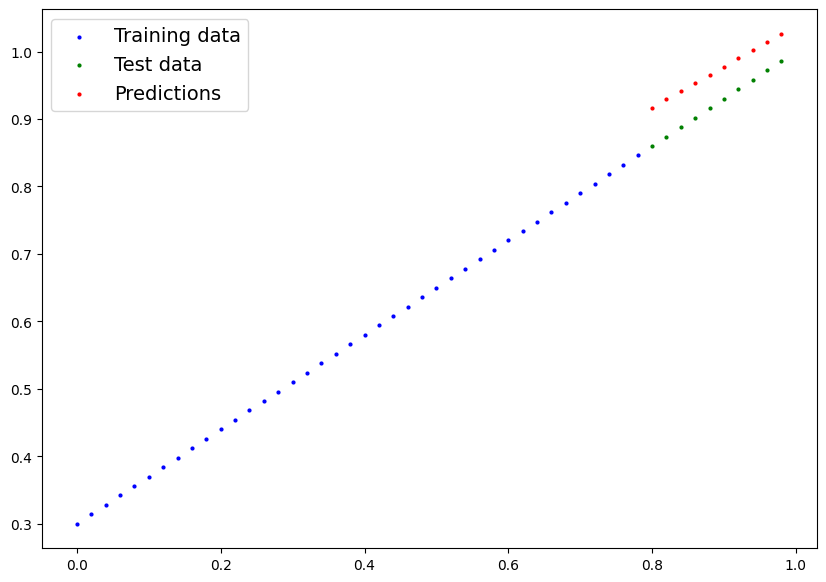

In [50]:
# Check out our model predicitons visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model

In [51]:
MODEL_2_NAME = "pytorch_workflow_model_2.pth"
MODEL_2_SAVE_PATH = MODEL_PATH / MODEL_2_NAME
torch.save(model_2.state_dict(), MODEL_2_SAVE_PATH)



In [52]:
loaded_model_2 = LinearRegressionModelV2()
loaded_model_2.load_state_dict(torch.load(MODEL_2_SAVE_PATH))

<All keys matched successfully>

In [53]:
loaded_model_2.state_dict(), model_2.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6085]])),
              ('linear_layer.bias', tensor([0.4300]))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6085]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.4300], device='cuda:0'))]))

In [54]:
loaded_model_2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

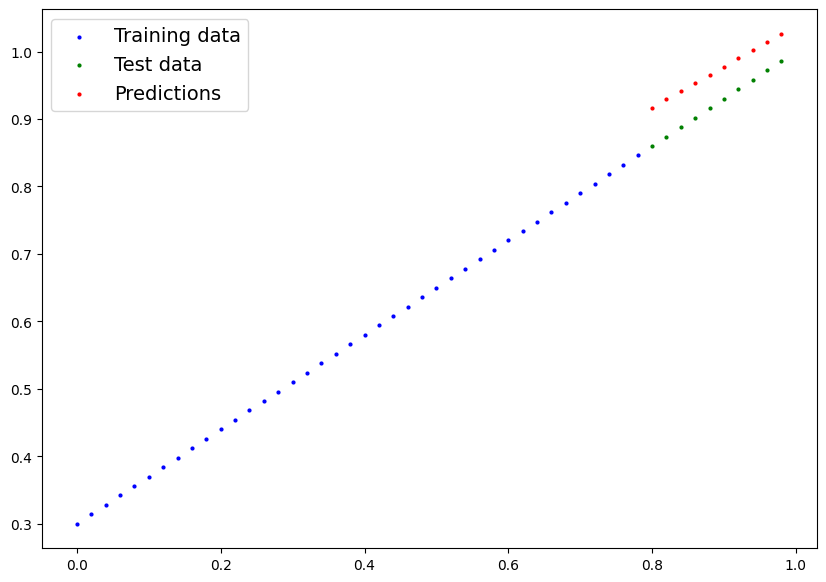

In [55]:
loaded_model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(predictions=y_preds.cpu())